# Active, Deaths and Recovered cases plot of different Indian States 

ADR (Active, Death and Recovered) cases of a state are based on a dataset provided by covid19india.org namely 'statewise daily'. The dataset consist of states and their datewise cases. We have calculated Active cases as:

Active = Confirmed - (Recovered + Deaths)

This script fetches the online datasets and parses through them for the required states and plot them in a tabular fashion with 3 columns (subplots). Each subplot presents a state data in form of stacked bar plots.

Datasets can be found here: https://api.covid19india.org/csv/. Their official github page is: https://github.com/covid19india/covid19india-react

Note: State name being used in code is compulsorily same as in datasets' column 'State'

In [ ]:
# Importing libraries
import pandas as pd
import operator
from datetime import datetime
from matplotlib.dates import DateFormatter
import math
import matplotlib.pyplot as plt

### Import and Load Datasets
#### Daily cases State-wise
In link provided above one can see various datasets in form of comma separated files(csv), we will import Datewise for States: 
 *'state_wise_daily.csv'*

In [ ]:
# Getting daily covid data statewise
StateDailydf = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')
StateDailydf.fillna(0, inplace=True)
StateDailydf

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,29-May-20,Recovered,11735,0,101,0,22,159,0,17,...,3,429,0,765,36,0,195,23,107,0
230,29-May-20,Deceased,269,0,1,0,0,0,0,1,...,2,4,0,9,4,0,4,0,7,0
231,30-May-20,Confirmed,8366,0,131,1,159,206,0,32,...,36,252,0,938,74,17,256,33,317,370
232,30-May-20,Recovered,4303,0,55,0,38,102,10,2,...,18,495,0,687,31,5,241,0,195,0


### Setting Duration with Terminal Dates


In [ ]:
# Setting begin date and end date
dfshape = StateDailydf.shape
BeginDate = datetime.strptime(StateDailydf['Date'][0],'%d-%b-%y').strftime("%d %B %Y")
EndDate = datetime.strptime(StateDailydf['Date'][dfshape[0]-1],'%d-%b-%y').strftime("%d %B %Y")
print(BeginDate)
print(EndDate)


14 March 2020
30 May 2020


### Preprocessing

The data columns represent states in their coded form, therefore we have created a dictionary representing their names

In [ ]:
# All states are mentioned as column name in coded form
StateDailydf.columns

Index(['Date', 'Status', 'TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DN',
       'DD', 'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL', 'LA', 'LD',
       'MP', 'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ', 'SK', 'TN',
       'TG', 'TR', 'UP', 'UT', 'WB', 'UN'],
      dtype='object')

In [ ]:
# Defining a dictionary for state name corresponding to their codes

statesUT = {
    'AN':'Andaman and Nicobar Islands',
    'AP':'Andhra Pradesh',
    'AR':'Arunachal Pradesh',
    'AS':'Assam',
    'BR':'Bihar',
    'CH':'Chandigarh',
    'CT':'Chhattisgarh',
    'DN':'Dadra and Nagar Haveli',
    'DD':'Daman and Diu',
    'DL':'Delhi',
    'GA':'Goa',
    'GJ':'Gujarat',
    'HR':'Haryana',
    'HP':'Himachal Pradesh',
    'JK':'Jammu and Kashmir',
    'JH':'Jharkhand',
    'KA':'Karnataka',
    'KL':'Kerala',
    'LA':'Ladakh',
    'LD':'Lakshadweep',
    'MP':'Madhya Pradesh',
    'MH':'Maharashtra',
    'MN':'Manipur',
    'ML':'Meghalaya',
    'MZ':'Mizoram',
    'NL':'Nagaland',
    'OR':'Odisha',
    'PY':'Puducherry',
    'PB':'Punjab',
    'RJ':'Rajasthan',
    'SK':'Sikkim',
    'TN':'Tamil Nadu',
    'TG':'Telangana',
    'TR':'Tripura',
    'UP':'Uttar Pradesh',
    'UK':'Uttarakhand',
    'WB':'West Bengal'
}

### Function for Parsing Data

The dataset consist of states with their daily data, therefore we have changed the dataset to make it cumulative and then fetching is done.

#### Create Cumulative Function

*Params*: None

*Returns*: None

Changes daily cases to cumulative, and therefore is called once

In [ ]:
# Function makes the imported data in its cumulative form keeping in mind each date as 3 subsections 
def createCumulative():
    
    for i in range(3,dfshape[0],3):
        StateDailydf.iloc[i,2:] = StateDailydf.iloc[i, 2:] + StateDailydf.iloc[i-3, 2:]
        StateDailydf.iloc[i+1,2:] = StateDailydf.iloc[i+1, 2:] + StateDailydf.iloc[i+1-3, 2:]
        StateDailydf.iloc[i+2,2:] = StateDailydf.iloc[i+2, 2:] + StateDailydf.iloc[i+2-3, 2:]
        

In [ ]:
# Calling above function to make those changes permanent
createCumulative()

#### Fetch State Function

*Params*: State name

*Returns*: State Dataframe

The dataset consists of Confirmed, Recovered and Deceased cases, we parse the dataset to find a particular state's values and then calculate Active cases and finally create the dataframe. The dataframe is printed and returned.

In [ ]:
# Function to create a dataframe for individual state with its daily cumulative Confirmed, Active, Recovered and Deceased cases
def fetchstate(state):
    
    stateindex = list(statesUT.keys())[list(statesUT.values()).index(state)]
    CCdata = []
    RCdata = []
    DCdata = []
    ACdata = []
    
    for i in range(dfshape[0]):
        if StateDailydf['Status'][i] == 'Confirmed':
            CCdata.append(StateDailydf[stateindex][i])
        if StateDailydf['Status'][i] == 'Recovered':
            RCdata.append(StateDailydf[stateindex][i])
        if StateDailydf['Status'][i] == 'Deceased':
            DCdata.append(StateDailydf[stateindex][i])
    
    ACdata = list(map(operator.sub,CCdata,list(map(operator.add, DCdata, RCdata))))
    
    Dateslist = pd.date_range(BeginDate, EndDate)
    df = pd.DataFrame(list(zip(CCdata, ACdata, RCdata, DCdata)),index = Dateslist, columns = ['Confirmed', 'Active','Recovered','Deaths'])
    print(state)
    print(df)
    return df

### Function for plotting the graph

*Params*: List of States (Number of States should be a multiple of 3)

*Returns*: None

Function plot subplots showing each state data as a stacked bar graph (x-axis: Dates, y-axis: No. of cases). 
This function uses all the above mentioned functions. Final plot is also saved in the same directory as 'png' file.

In [ ]:
# Function takes in a list of states for plotting thier ADR data in multiple of 3
# Each State is plotted in one of the 3 columns of the figure
# The list is looped and then the plotting is done

def PlotStatesADRData(loc):

    noc = len(loc)
    nor = math.ceil(noc/3)
    
    fig, axes = plt.subplots(nrows = nor, ncols = 3, figsize = (20,13))
    fig.suptitle('Active, Death and Recovered Cases in selected states as of ' + EndDate, fontsize = 18)
    plt.subplots_adjust(hspace = .4)
    
    k = 0
    for i in range(nor):
        for j in range(3):
            if k < noc:
                StateData = fetchstate(loc[k])
                
                axes[i,j].bar(StateData.index, StateData['Active'], color = 'indigo', width = 1, edgecolor = 'white', linewidth = 0.1, label = 'Active')
                axes[i,j].bar(StateData.index, StateData['Deaths'], color = 'red', width = 1, edgecolor = 'white', linewidth = 0.1, label = 'Deaths', bottom = StateData['Active'])
                axes[i,j].bar(StateData.index, StateData['Recovered'], color = 'green', width = 1, edgecolor = 'white', linewidth = 0.1, label = 'Recovered', bottom = StateData['Active'] + StateData['Deaths'])
                
                axes[i,j].set_title(loc[k], y = 1, fontsize = 14, fontweight='bold')
                
                axes[i,j].grid(axis = 'y', alpha = 0.5)
                
                myFmt = DateFormatter("%d-%b")
                axes[i,j].xaxis.set_major_formatter(myFmt)
                
                axes[i,j].spines['top'].set_visible(False)
                axes[i,j].spines['right'].set_visible(False)
                
                if k == noc-1:
                    handles, labels = axes[i,j].get_legend_handles_labels()
                
                k = k + 1
    
    fig.legend(handles, labels, bbox_to_anchor=(0.51, 0.95), loc='upper center', ncol = 3, fontsize = 13, frameon=False)
    
    plt.savefig('ADR.png')
    plt.show()
# --- Function Ends Here ---


### Create a List of States

When passing the name of states take special care of how they are spelled in the dictionary created above.

In [ ]:
list_of_states = ['Maharashtra', 'Delhi', 'Uttar Pradesh', 
                  'Kerala', 'West Bengal', 'Karnataka',
                  'Gujarat', 'Haryana', 'Madhya Pradesh',
                  'Bihar', 'Rajasthan', 'Andhra Pradesh']

### Finally the Plot

The plot is preceded by dataframe of the states passed. Also check image of the plot, saved in your system.

Maharashtra
            Confirmed  Active  Recovered  Deaths
2020-03-14         14      14          0       0
2020-03-15         32      32          0       0
2020-03-16         38      38          0       0
2020-03-17         41      40          0       1
2020-03-18         44      43          0       1
...               ...     ...        ...     ...
2020-05-26      54758   36013      16954    1791
2020-05-27      56948   37134      17918    1896
2020-05-28      59546   38949      18616    1981
2020-05-29      62228   33134      26997    2097
2020-05-30      65168   34891      28081    2196

[78 rows x 4 columns]
Delhi
            Confirmed  Active  Recovered  Deaths
2020-03-14          7       5          1       1
2020-03-15          7       4          2       1
2020-03-16          7       4          2       1
2020-03-17          8       5          2       1
2020-03-18         10       7          2       1
...               ...     ...        ...     ...
2020-05-26      14465    722

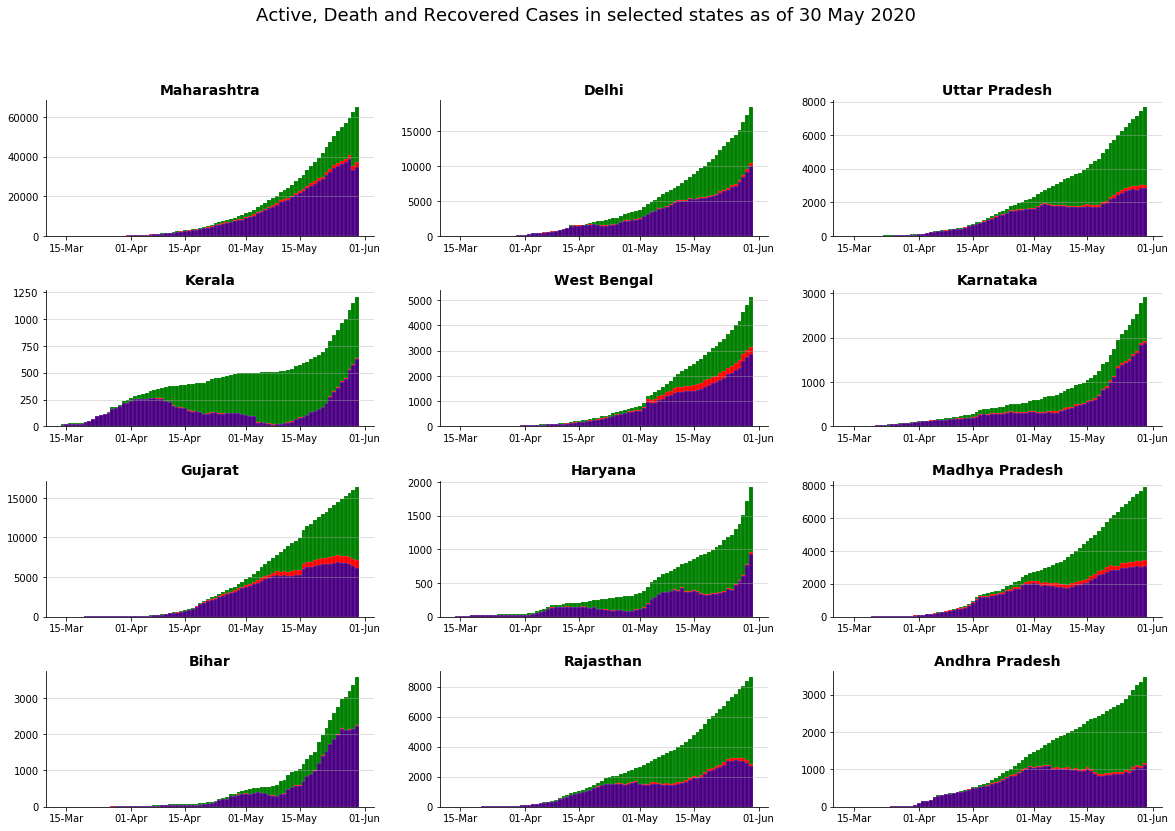

In [ ]:
PlotStatesADRData(list_of_states)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d20f0b1-a95e-4774-951b-ce52162787ce' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>